### Project 1: Affordable Housing Production by Building


***
##### Task 1: Data Collection and Preprocessing
First we will collect the data and store it in a dataframe:

In [ ]:
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv('Affordable_Housing_Production_by_Building_20240310.csv')
df

Next we clean and preprocess the data to ensure accuracy and consistency:

In [218]:
import ipywidgets as widgets
from IPython.display import display
# pd.set_option('display.max_columns', None)

# # Convert "Project Start Date" and "Project Completion Date" columns to datetime
# df['Project Start Date'] = pd.to_datetime(df['Project Start Date'])
# df['Project Completion Date'] = pd.to_datetime(df['Project Completion Date'])

# # Calculate average completion time
# average_completion_time = (df['Project Completion Date'] - df['Project Start Date']).mean()

# # Fill missing values in "Project Completion Date" column
# df['Project Completion Date'].fillna(df['Project Start Date'] + average_completion_time, inplace=True)

# # Remove the time part of the date
# df['Project Completion Date'] = df['Project Completion Date'].dt.date

# # One hot encode the "Borough" column because it is a categorical
# df = pd.get_dummies(df, columns=['Borough'])

# # Split the "Community Board" column into "Borough" and "Board Number" columns
# df['Borough'] = df['Community Board'].str.split('-').str[0]
# df['Board Number'] = df['Community Board'].str.split('-').str[1]

# # Drop the original 'Community Board' column
# df.drop(columns=['Community Board'], inplace=True)

# # Drop NTA Name and NTA - Neighborhood Tabulation Area column because it is not useful
# df.drop(columns=['NTA - Neighborhood Tabulation Area'], inplace=True)

# # Replace building completion dates with new column "Building Completed" that is True if the building has a date and False if it does not
# df['Building Completed'] = df['Building Completion Date'].apply(lambda x: True if pd.notnull(x) else False)

# # Drop Builidng Completion Date column
# df.drop(columns=['Building Completion Date'], inplace=True)

# # Drop Cencus Tract column
# df.drop(columns=['Census Tract'], inplace=True)

# # Drop Borough column
# df.drop(columns=['Borough'], inplace=True)

# # Drop Latitude and Longitude as well as other useless columns
# df.drop(columns=['Latitude', 'Longitude', 'BIN', 'BBL'], inplace=True)

# # Drop latitude (internal use only) and longitude (internal use only) columns
# df.drop(columns=['Latitude (Internal)', 'Longitude (Internal)'], inplace=True)

# # Drop Number column (too vague)
# df.drop(columns=['Number'], inplace=True)

# # Remove decimal point from the Building ID column (they all end in .0 for no reason)
# df['Building ID'] = df['Building ID'].fillna(0).astype(int)


# #  Calculate the duration of the project IN DAYS (Project Completion Date - Project Start Date) and put it into a new column labelled "Project Duration"
# df['Project Start Date'] = pd.to_datetime(df['Project Start Date'])
# df['Project Completion Date'] = pd.to_datetime(df['Project Completion Date'])
# df['Project Duration'] = (df['Project Completion Date'] - df['Project Start Date']).dt.days


# # One hot encode the "Reporting Construction Type" column because it is a categorical
# df = pd.get_dummies(df, columns=['Reporting Construction Type'])


# # One hot encode the "Extended Affordability Only" column because it is a categorical
# df = pd.get_dummies(df, columns=['Extended Affordability Only'])

# # Remove the decimal from postcode
# df.loc[:, 'Postcode'] = df['Postcode'].fillna(0).astype(int)

# # One hot encode the "Prevailing Wage Status" column because it is a categorical
# df = pd.get_dummies(df, columns=['Prevailing Wage Status'])

# # Make sure the "Project Name" column is in all uppercase
# df['Project Name'] = df['Project Name'].str.upper()


# # Drop Project name column as its not usefull
# df.drop(columns=['Project Name'], inplace=True)

# # Drop Street because it is not useful information
# df.drop(columns=['Street'], inplace=True)

# df



,Project ID,Project Start Date,Project Completion Date,Building ID,Postcode,Council District,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Studio Units,1-BR Units,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Borough_Bronx,Borough_Brooklyn,Borough_Manhattan,Borough_Queens,Borough_Staten Island,Board Number,Building Completed,Project Duration,Reporting Construction Type_New Construction,Reporting Construction Type_Preservation,Extended Affordability Only_No,Extended Affordability Only_Yes,Prevailing Wage Status_Non Prevailing Wage,Prevailing Wage Status_Prevailing Wage
153,48767,149,0,40676,10031,7,0,0,30,0,0,0,1,0,23,6,0,0,0,0,30,0,30,30,False,False,True,False,False,09,True,0,False,True,False,True,True,False
154,48767,149,0,844218,10027,7,0,0,41,0,0,0,0,2,27,12,0,0,0,0,41,0,41,41,False,False,True,False,False,09,True,0,False,True,False,True,True,False
193,49071,160,0,856988,10460,15,0,0,83,0,0,1,0,18,54,12,0,0,0,0,84,0,84,84,True,False,False,False,False,06,True,0,False,True,False,True,True,False
196,49174,514,0,77395,10474,17,0,2,7,0,0,1,0,0,0,10,0,0,0,0,10,0,10,10,True,False,False,False,False,02,True,0,False,True,False,True,True,False
197,49174,514,0,80236,10474,17,0,2,11,0,3,0,1,11,4,0,0,0,0,0,16,0,16,16,True,False,False,False,False,02,True,0,False,True,False,True,True,False


##### Task 2: Data Visualization
Now we will produce some data visuals to unveil patterns and correlations in the dataset

We can see that old/already made houses are the best for affordable housing. This makes sense because new homes are more expensive because they are newer and more desirable

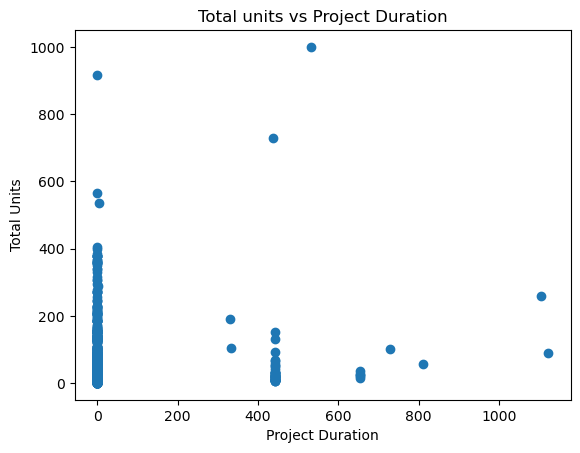

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of 'Project Duration' vs 'Total Units'
plt.scatter(df['Project Duration'], df['Total Units'])
plt.xlabel('Project Duration')
plt.ylabel('Total Units')
plt.title('Total units vs Project Duration')
plt.show()

Heatmap of the correlation matrix focusing on just 1 to 5 bedroom units.

If we look at the left side between "Extremely low income units" to "Middle income units" we can see that more 1 BR units are in the range. As we make our way to the 5 BR units, theres is a smaller correlation, indicating that 4 and 5 BR units are less likely to be occupied by low and middle income people.

We can also see that most units are for 1 and 2 BR units. This indicates that majority of afforable housing by building is 1 and 2 bedroom units. There are less affordable housing for 3, 4, and 5 BR units.

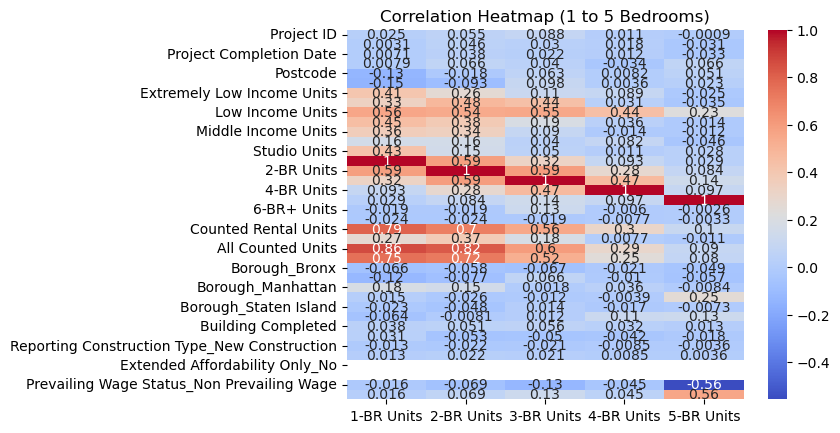

In [138]:
# Filter the correlation matrix for columns related to 1 to 5 bedrooms
filtered_corr_matrix = correlation_matrix[['1-BR Units', '2-BR Units', '3-BR Units', '4-BR Units', '5-BR Units']]

# Plot the heatmap
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (1 to 5 Bedrooms)')
plt.show()

Below is a graph of income levels vs boroughs. As you can seem, there is very little housing in the Bronx. Next is Brooklyn with slighy more housing, mostly for low income units. Next is Manhattan, which has the largest amount of housing for all levels income units. Queens follows next with most housing for Very low and low income units. Lastly, Staten Island has mostly housing for Low income units. 

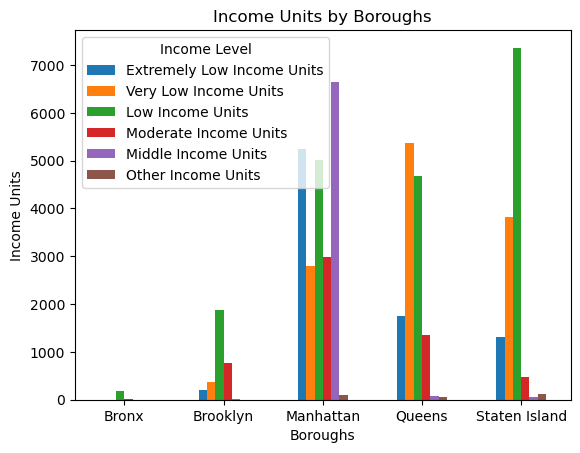

In [137]:
# Group the dataframe by borough and sum the income units
income_units_by_borough = df.groupby(['Borough_Bronx', 'Borough_Brooklyn', 'Borough_Manhattan', 'Borough_Queens', 'Borough_Staten Island'])[columns_to_sum].sum()

# Plot the bar chart
ax = income_units_by_borough.plot(kind='bar')
ax.set_xlabel('Boroughs')
ax.set_ylabel('Income Units')
ax.set_title('Income Units by Boroughs')
ax.set_xticklabels(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], rotation=0)
ax.legend(title='Income Level')
plt.show()


Below you can see that almost all units are Preservations. Barely any are new construction. There are a few take aways from this. First, that New York in general doesn't have a lot of new construction. All of it is preserved and re used. Next, the obvious is almost none of the affordable housing comes from new constructions.

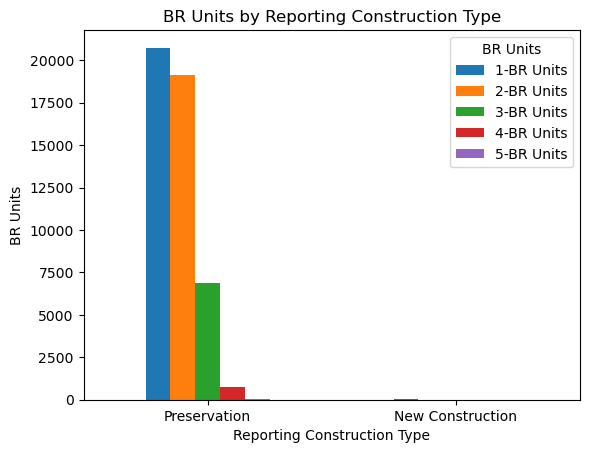

In [142]:
# Group the dataframe by Reporting Construction Type and sum the BR units
br_units_by_construction_type = df.groupby('Reporting Construction Type_New Construction')[['1-BR Units', '2-BR Units', '3-BR Units', '4-BR Units', '5-BR Units']].sum()

# Plot the bar chart
br_units_by_construction_type.plot(kind='bar')
plt.xlabel('Reporting Construction Type')
plt.ylabel('BR Units')
plt.title('BR Units by Reporting Construction Type')
plt.xticks([0, 1], ['Preservation', 'New Construction'], rotation=0)
plt.legend(title='BR Units')
plt.show()


Income Units by Borough: As we can see, the bronx has no extremely or very low units. Its all just low income. Manhattan has the most housing, as well as the most middle class units.

BR Units by Boroughs: Manhattan, Queens, and Staten Island have lots of 1 BR units. They also have a good amount of 2 BR units. All 3 have a little 3 BR units, as well as very few 4 BR units.

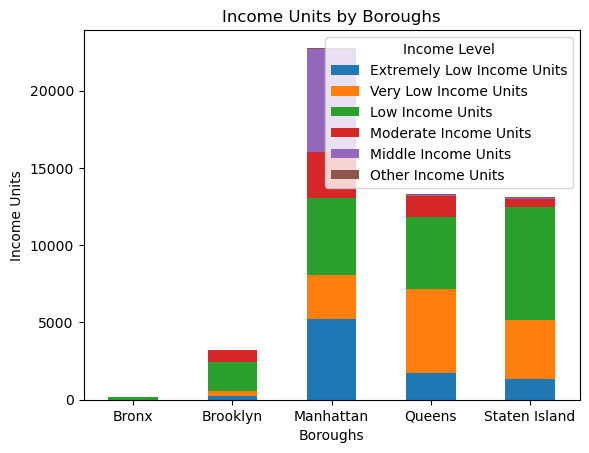

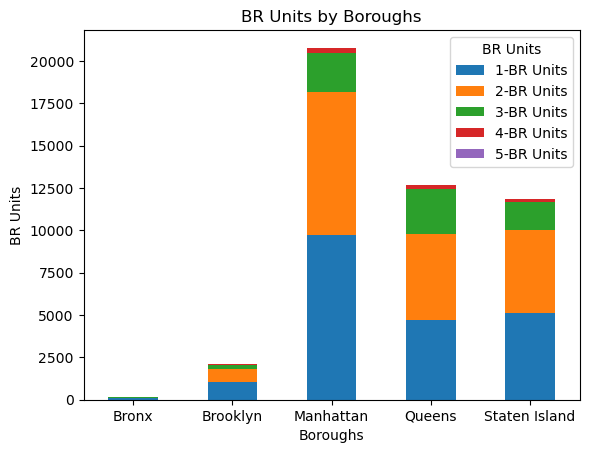

In [144]:
import matplotlib.pyplot as plt

# Group the dataframe by borough and sum the income units and BR units
income_units_by_borough = df.groupby(['Borough_Bronx', 'Borough_Brooklyn', 'Borough_Manhattan', 'Borough_Queens', 'Borough_Staten Island'])[['Extremely Low Income Units', 'Very Low Income Units', 'Low Income Units', 'Moderate Income Units', 'Middle Income Units', 'Other Income Units']].sum()
br_units_by_borough = df.groupby(['Borough_Bronx', 'Borough_Brooklyn', 'Borough_Manhattan', 'Borough_Queens', 'Borough_Staten Island'])[['1-BR Units', '2-BR Units', '3-BR Units', '4-BR Units', '5-BR Units']].sum()

# Plot the bar chart for income units
income_units_by_borough.plot(kind='bar', stacked=True)
plt.xlabel('Boroughs')
plt.ylabel('Income Units')
plt.title('Income Units by Boroughs')

# Set custom x-axis labels
boroughs = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
plt.xticks(range(len(boroughs)), boroughs, rotation=0)

plt.legend(title='Income Level')
plt.show()

# Plot the bar chart for BR units
br_units_by_borough.plot(kind='bar', stacked=True)
plt.xlabel('Boroughs')
plt.ylabel('BR Units')
plt.title('BR Units by Boroughs')

# Set custom x-axis labels
plt.xticks(range(len(boroughs)), boroughs, rotation=0)

plt.legend(title='BR Units')
plt.show()


In general, through the visuals, we can see the patterns and correlations when it comes to BR units and boroughs. We can also see the correlations between income class and boroughs. I selected these visuals so we can understand the spread of affordable housing around New York. It is appropriate for my analysis because we now have a better understanding of where the affordable units are, along with some of there properties and locations. 

##### Task 3: Regression Analysis
Now we will do our regression analysis

Define the target variable in the dataset and apply multiple regression model.

I also made a prediction below the regression model.

Overall, the graph shows that my predictions are very similar to the actual results. We are predicting the project completion date well. We can see the MSE is a small number which means that are model is predicting well. My model has a test size of 70% while the other 30% is used for training. I found this to be a good balance because it gave me good outputs.

Mean Squared Error: 9.99217125967696e-24


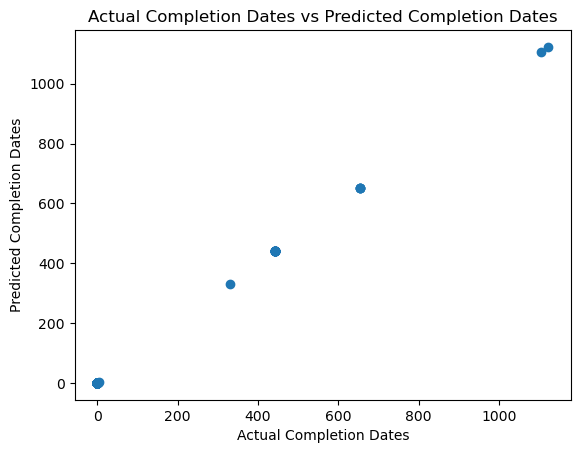

Predicted Completion Date: [6.12975524e-11]


In [256]:
# Define the target variable
target_variable = df['Project Completion Date']

# Select the features for the regression analysis
features = df[['Borough_Bronx', 'Borough_Brooklyn', 'Borough_Manhattan', 'Borough_Queens', 'Borough_Staten Island', 
               '1-BR Units', '2-BR Units', '3-BR Units', 'Total Units', 'Project Start Date', 'Project Duration']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target_variable, test_size=0.7, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the predicted project completion dates
# print(y_pred)

# Create a scatter plot of actual completion dates vs predicted completion dates
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Completion Dates')
plt.ylabel('Predicted Completion Dates')
plt.title('Actual Completion Dates vs Predicted Completion Dates')
plt.show()


# 3######################

# Define new data with a dummy 'Project Duration' column
new_data = {
    'Borough_Bronx': [0],
    'Borough_Brooklyn': [0],
    'Borough_Manhattan': [1],
    'Borough_Queens': [0],
    'Borough_Staten Island': [0],
    '1-BR Units': [10],
    '2-BR Units': [20],
    '3-BR Units': [5],
    'Total Units': [35],
    'Project Start Date': ['2020-03-15'],
    'Project Duration': [0]  # Dummy value
}

# Create a DataFrame for the new data
new_df = pd.DataFrame(new_data)

# Convert 'Project Start Date' to numeric
new_df['Project Start Date'] = (pd.to_datetime(new_df['Project Start Date']) - pd.to_datetime(df['Project Start Date']).min()).dt.days

# Make predictions
new_pred = model.predict(new_df)

# Print predicted project completion date
print(f'Predicted Completion Date: {new_pred}')





Evaluating the model with 2 evaluation metrics.

The first metric I used is the Mean Absolute Error. My MAE is 2.49, which means that on average the models predictions are very close to the actual values. This is great beacuse it means my model is making good predictions.

The next metric we have is R squared. R^2. The closer R^2 is to 1, the better. This is pretty straight forward as my R^2 is at 1.

In [258]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R^2) score
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R^2) Score: {r2}')


Mean Absolute Error (MAE): 2.4917919632045157e-12
R-squared (R^2) Score: 1.0
